# Grundwasser Extremereignis Vorhersage mit Random Forest anhand Niederschlag und Temperatur

In [1]:
from tools.InstanceAssembler import point_data_assembler
from tools.FeatureHandlers import RegnieHandler, DWDAirTempHandler, UTMEastingHandler, UTMNorthingHandler, XtremeBoundHandler, GwLvlChangeHandler
from tools.TargetHandlers import XtremeClassificationHandler
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from datetime import date, timedelta
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import shap

In [2]:
stations = pd.read_csv(r'G:/GruV-Net/data/anthropogen-unbeeinflusste-Messstellen/HE_complete.csv', header=0).ProjID.tolist()
dates = pd.date_range(date(2009,2,2), date(2017,12,25), freq='W-MON').date

In [3]:
start_time = time.time()

data = point_data_assembler(
    stations=stations,
    dates=dates,
    n_weeks=52,
    stepsize=1,
    pred_offset=4,
    target_handler=XtremeClassificationHandler(offset=4, lower_quantile=0.05, upper_quantile=0.95),
    dynamic_feature_handlers=[RegnieHandler(raster_size=11, raster_func=np.mean), DWDAirTempHandler(raster_size=11, raster_func=np.mean), GwLvlChangeHandler(offset=4)],
    static_feature_handlers=[UTMEastingHandler(), UTMNorthingHandler(), XtremeBoundHandler(quantile=0.05), XtremeBoundHandler(quantile=0.95), XtremeBoundHandler(quantile=0.5)],
    )

print("--- %s seconds ---" % (time.time() - start_time))

--- 9035.672956466675 seconds ---


In [4]:
data.to_csv(r'G:/GruV-Net/data/assembled_instances/GruVXtreme/2009-02-02_2017-12-25_all-stations_52w_offset4_Regnie-AirTemp-UTMCoord-Bounds_GwLvl_raster11_mean.csv')
#data = pd.read_csv(r'G:/GruV-Net/data/assembled_instances/GruVXtreme/2009-02-02_2017-12-25_all-stations_52w_offset4_Regnie-AirTemp-UTMCoord_raster11_mean.csv', index_col=0)

In [5]:
data

,Date,Station,XtremeClass,UTMEasting,UTMNorthing,XtremeBound0.05,XtremeBound0.95,XtremeBound0.5,Regnie0,DWDAirTemp0,...,GwLvlChange48,Regnie49,DWDAirTemp49,GwLvlChange49,Regnie50,DWDAirTemp50,GwLvlChange50,Regnie51,DWDAirTemp51,GwLvlChange51
0,2009-02-02,HE_9523,0.0,504533,5566642,-0.7205,0.74725,0.00,14.355373,44.165291,...,0.130000,1.200809,13.495868,NaN,5.498591,13.495868,NaN,0.866850,-21.256199,0.74
1,2009-02-02,HE_10223,0.0,510151,5554577,-0.3105,0.30400,0.00,15.696871,43.115704,...,0.140000,0.633035,12.462810,NaN,4.072534,12.462810,NaN,0.380160,-24.991735,0.18
2,2009-02-02,HE_8872,0.0,506353,5573350,-0.5480,0.58800,0.00,13.949748,41.950413,...,0.340000,1.075200,11.347108,NaN,6.588911,11.347108,NaN,1.051381,-22.743801,0.50
3,2009-02-02,HE_10225,-1.0,508082,5555747,-0.7515,0.63075,0.00,15.176651,44.322315,...,-0.200000,0.629307,13.636364,NaN,4.068375,13.636364,NaN,0.392859,-23.595041,1.16
4,2009-02-02,HE_9482,0.0,494727,5568712,-0.7300,0.68000,0.00,10.022560,45.388432,...,0.140000,0.282760,15.702479,NaN,4.372041,15.702479,NaN,1.306451,-21.413223,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152980,2017-12-25,HE_8999,NaN,543298,5580956,-2.0900,2.14000,0.02,1.721236,4.975206,...,-0.640000,9.107618,42.140495,NaN,44.138382,42.140495,NaN,28.762079,42.140495,NaN
152981,2017-12-25,HE_8957,NaN,529923,5580147,-2.4210,2.64525,-0.08,1.801329,8.239670,...,1.200000,10.050959,44.380165,1.34,50.371204,44.380165,1.89,37.851845,44.380165,NaN
152982,2017-12-25,HE_6362,NaN,518368,5644331,-0.1200,0.11550,0.00,2.650348,15.347108,...,NaN,4.236617,49.801651,NaN,24.925440,49.801651,NaN,20.799204,49.801651,NaN
152983,2017-12-25,HE_15651,NaN,474196,5584236,-1.2740,1.30000,-0.02,0.997533,17.504131,...,0.366667,5.387736,51.545456,-0.03,14.977531,51.545456,0.09,24.800459,51.545456,NaN


In [10]:
drop = data.dropna(subset=['XtremeClass'])
drop = drop.fillna(0)

In [16]:
X = drop.iloc[:50000,3:]
Y = drop.iloc[:50000,2]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [18]:
model = RandomForestClassifier(max_depth=30)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=30)

In [19]:
preds = model.predict(X_test)
metrics.accuracy_score(preds,Y_test)

0.9378

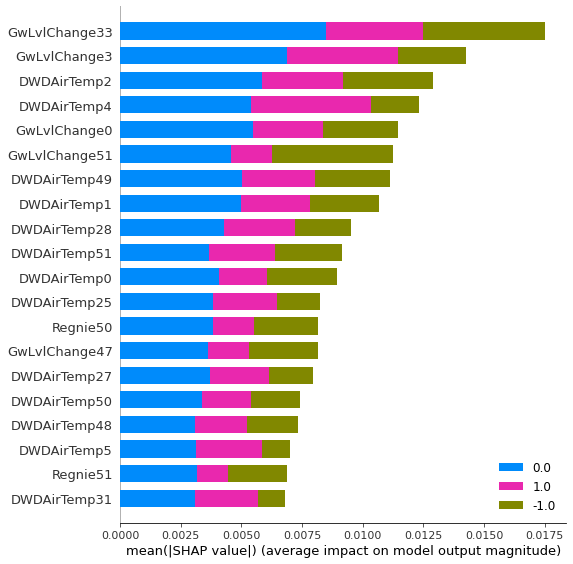

In [20]:
shap_values = shap.TreeExplainer(model).shap_values(X_train.iloc[:1000,:])
shap.summary_plot(shap_values, X_train, class_names=model.classes_, plot_type="bar")